In [1]:
import os
os.chdir(r"D:\강의 자료\2008_온라인 강의 머신러닝 성능 향상을 위한 데이터 탐색과 전처리 심화\데이터\실습 데이터")

In [2]:
import pandas as pd
df = pd.read_csv("appendicitis.csv")

In [3]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [13]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [14]:
# 특징에 따른 SVM 모델 테스트 함수 작성
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def feature_test(Train_X, Test_X, Train_Y, Test_Y, features):
    s_Train_X = Train_X[features]
    s_Test_X = Test_X[features]
    
    model = SVC().fit(s_Train_X, Train_Y)
    pred_Y = model.predict(s_Test_X)    
    return f1_score(Test_Y, pred_Y)

base_score = feature_test(Train_X, Test_X, Train_Y, Test_Y, Train_X.columns) # 모든 특징을 썼을 때의 점수
print(base_score)

0.3333333333333333


In [15]:
import itertools
c_list = list(range(1, len(Train_X.columns)))
outperform_ratio_list = []
best_score = 0

for c in range(1, len(Train_X.columns)): # c = 선택한 특징 개수
    print(c)
    c_num = 0 # 특징을 c개 뽑았을 때, 원본보다 성능이 좋은 경우
    c_dem = 0 # 특징을 c개 뽑는 경우의 수
    
    for features in itertools.combinations(Train_X.columns, c):
        score = feature_test(Train_X, Test_X, Train_Y, Test_Y, list(features)) # itertools은 tuple 형태로 값을 반환해서 형변환을 해준 것
        if score > best_score:
            best_score = score
            best_feature = list(features)
        
        if score > base_score:
            c_num += 1
        c_dem += 1
    
    outperform_ratio_list.append(c_num / c_dem)

1
2
3
4
5
6


<BarContainer object of 6 artists>

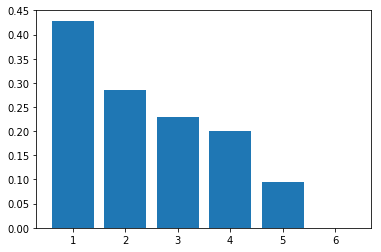

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(c_list, outperform_ratio_list)

In [17]:
best_feature, best_score

(['At1', 'At6'], 0.5714285714285715)